In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ls -la

total 20
drwxr-xr-x 1 root root 4096 Oct 28 13:50 ./
drwxr-xr-x 1 root root 4096 Oct 28 13:47 ../
drwxr-xr-x 4 root root 4096 Oct 26 13:33 .config/
drwx------ 6 root root 4096 Oct 28 13:50 drive/
drwxr-xr-x 1 root root 4096 Oct 26 13:34 sample_data/


In [3]:
cd /content/drive/MyDrive/News

/content/drive/MyDrive/News


In [4]:
ls 

lstm_model_v1.pt  news.csv  News.ipynb  X_df.csv  X_train_df.csv  X_val_df.csv


In [5]:
import os
import platform

import zipfile

In [6]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (15, 10)
sns.set_theme(style="whitegrid")
%matplotlib inline

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
EPS = 10**(-3)
EPS

0.001

In [9]:
platform.system()

'Linux'

In [10]:
SEED = 42

ROOT = ""
if platform.system() == "Windows":
    CACHE_DIR = "D:/.cache"
else:
    CACHE_DIR = ".cache"

zip_folder = "news.zip"

news_csv = "news.csv"

In [11]:
#with zipfile.ZipFile(os.path.join(ROOT, zip_folder), 'r') as zip_ref:
#    zip_ref.extractall(ROOT)

In [12]:
data_df = pd.read_csv(os.path.join(ROOT, news_csv), index_col=0)
data_df

,news,source
0,Официальный аккаунт PlayStation опубликовал т...,1.0
1,Китайская компания Mobvoi опубликовала на офи...,1.0
2,Практически во всех странах мира введены огра...,0.0
3,"Депутат Госдумы, единоросс Антон Горелкин вне...",2.0
4,Совет директоров «Почты России» проголосовал ...,2.0
...,...,...
19457,С 17 декабря в России блокируется один из кру...,NaN
19458,Первые упоминания разработки тёмной темы в Go...,NaN
19459,Компания Oppo презентовала два новых продукта...,NaN
19460,"Основой презентации стала Windows 10, которая...",NaN


In [13]:
train_df =  data_df[~data_df["source"].isna()]
train_df

,news,source
0,Официальный аккаунт PlayStation опубликовал т...,1.0
1,Китайская компания Mobvoi опубликовала на офи...,1.0
2,Практически во всех странах мира введены огра...,0.0
3,"Депутат Госдумы, единоросс Антон Горелкин вне...",2.0
4,Совет директоров «Почты России» проголосовал ...,2.0
...,...,...
18355,С 17 декабря в России блокируется один из кру...,1.0
18356,Первые упоминания разработки тёмной темы в Go...,1.0
18357,Компания Oppo презентовала два новых продукта...,1.0
18358,"Основой презентации стала Windows 10, которая...",0.0


In [14]:
train_df["source"] = train_df["source"].astype(dtype=int)
train_df

,news,source
0,Официальный аккаунт PlayStation опубликовал т...,1
1,Китайская компания Mobvoi опубликовала на офи...,1
2,Практически во всех странах мира введены огра...,0
3,"Депутат Госдумы, единоросс Антон Горелкин вне...",2
4,Совет директоров «Почты России» проголосовал ...,2
...,...,...
18355,С 17 декабря в России блокируется один из кру...,1
18356,Первые упоминания разработки тёмной темы в Go...,1
18357,Компания Oppo презентовала два новых продукта...,1
18358,"Основой презентации стала Windows 10, которая...",0


In [15]:
test_df =  data_df[data_df["source"].isna()].drop(columns="source")
test_df

,news
18360,Глава форума Reddit Стив Хаффман раскритикова...
18361,Французское архитектурное бюро Vincent Calleb...
18362,"Samsung провела мероприятие Galaxy Unpacked, ..."
18363,В бета-версии клиента Telegram для Android с ...
18364,Журналистам из XDA удалось раздобыть минималь...
...,...
19457,С 17 декабря в России блокируется один из кру...
19458,Первые упоминания разработки тёмной темы в Go...
19459,Компания Oppo презентовала два новых продукта...
19460,"Основой презентации стала Windows 10, которая..."


In [16]:
train_df["news"].iloc[1], train_df["source"].iloc[1]

(' Китайская компания Mobvoi опубликовала на официальном сайте тизер второго поколения умных часов Ticwatch Express. Изображение демонстрирует дизайн часов и слоган: «Теперь вода — друг ваших часов». Вероятно, во втором поколении устройства Mobvoi повысит рейтинг защиты от воды. Оригинальные Ticwatch Express были выпущены вместе с моделью Sport через кампанию на Kickstarter . Часы работают на Wear OS и предлагают 1,4-дюймовый AMOLED-дисплей, процессор MTK MT2601, 512 МБ ОЗУ, 4 ГБ ПЗУ, GPS, Wi-Fi, Bluetooth, оптический датчик ЧСС и защиту от воды по стандарту IP67. Ключевая особенность устройства — цена. Розничная стоимость Ticwatch Express на старте продаж составила 159 долларов (~10 600 рублей), а в рамках кампании часы предлагались за 99 долларов (~6 600 рублей). ',
 1)

In [17]:
train_df["news"].iloc[2], train_df["source"].iloc[2]

(' Практически во всех странах мира введены ограничительные меры, связанные с эпидемией коронавируса. Многие люди вынуждены работать из дома, сократив количество выходов на улицу до минимума. Из-за этого все дни недели — и будни, и выходные — стали подозрительно похожи друг на друга. Пользователи не могли не заметить аналогию с фильмом «День сурка» с Биллом Мюрреем в главной роли. На удаленке многим пришлось привыкать к новым способам общения с коллегами, используя приложения для видеоконференций. Так, многие открыли для себя Zoom. А так могла бы выглядеть Тайная вечеря, если бы все ее участники находились на самоизоляции. Многие считают, что именно владельцы приложения Zoom могут быть главными бенефициарами пандемии. В этой связи приобретает актуальность мем из мультфильма «Скуби-Ду», в конце которого главные герои по традиции выясняют, кто же находится под маской злодея. Чуть меньше повезло тем, кто и вовсе остался без работы. Впрочем, эти люди не унывают и мечтают о том, как снова в

In [18]:
train_df["news"].iloc[5], train_df["source"].iloc[5]

(' Музей «Яндекса» приглашает всех желающих на «Демодуляцию» — это фестиваль ретрокомпьютеров, который пройдёт во второй раз. На этот раз фестиваль состоится онлайн, трансляция начнётся 12 декабря в 11:00 по МСК. Мероприятие бесплатное. Гостем шоу станет Джон Ромеро, один из создателей Wolfenstein 3D, DOOM, Quake и множества других игр. Фестиваль объединит тех, кому интересна история технологий. Зрители увидят легендарные компьютеры и игровые консоли, а также игры для ретроплатформ — как старые, так и созданные недавно. Программу фестиваля откроет Джон Ромеро: он выступит в прямом эфире, а затем будет стримить и комментировать игру, победившую на Yandex Retro Games Battle 2020 — конкурсе «Яндекса» по разработке игр для ретроплатформ, — «Яндекс». Зрители мероприятия смогут принять участие в викторинах на знание ретротехники, а также в конкурсах по компьютерной графике, программированию и электронной музыке. Свои работы на конкурсы можно присылать уже сейчас. «Яндекс» обещает победителям

In [19]:
train_df["news"].iloc[21], train_df["source"].iloc[21]

(' Гендиректор «Роскосмоса» Игорь Комаров заявил, что достижения компании Илона Маска SpaceX заставляют российскую госкорпорацию работать. Таким образом он прокомментировал успешный повторный запуск ракеты Falcon 9. «Они, безусловно, заставляют нас работать… Это очень важный шаг, мы искренне поздравляем коллегу с этим замечательным достижением», — сказал Комаров.  Он добавил, что «Роскосмос» тоже будет «использовать возможности возвращаемых составных частей ракеты», однако еще нужно проанализировать экономическую эффективность такого подхода.  Как сообщалось, 30 марта SpaceХ, основанная и возглавляемая Илоном Маском, впервые в истории произвела повторный запуск ракеты-носителя. Был осуществлен успешный старт ракеты Falcon 9, первая ступень которой с девятью двигателями уже использовалась в апреле 2016 г. После этого она вернулась и приземлилась на специальную платформу.  ',
 2)

In [20]:
# По проссмотренныем примерам выше, складывается ощущение, что:

# 0.0 - Тематики медецины, ковида и тому подобное .. т.е. источником
# может быть портал про здоровье и ситуацию в мире, связанную с пандемией

# 1.0 - Тематика новых технологий и тому подобное.Часто встречаются
# слова на английском языке, названия компаний

# 2.0 - Тематики новостей РФ, политика и другие новости, которые 
# которые освещаются в прессе

In [21]:
train_df["source"].value_counts() 

1    11698
0     3455
2     3207
Name: source, dtype: int64

In [22]:
a = train_df["source"].value_counts(normalize=True)
a

1    0.637146
0    0.188181
2    0.174673
Name: source, dtype: float64

In [23]:
# явный дисбаланс классов... возможно стоит использовать перевзвешенный лосс

In [24]:
1 / (a + EPS) # пример перевзвешивания важности классов

1    1.567040
0    5.285948
2    5.692388
Name: source, dtype: float64

In [25]:
# Посмотрим на распределение количества английских слов, которое 
# встречается в каждой статье, т.к. есть предположение, что в статьях
# о технологиях процентное соотношение слов на английском языке будет 
# сравнимо больше, чем статьи из источников про медицыну или РФ новости

In [26]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [27]:
from itertools import chain

In [28]:
def count_eng_words(example_str, normalize=True):
    self = count_eng_words
    if not hasattr(self, "eng_chars"):
        self.eng_chars = [chr(ord_indx) for ord_indx in chain(range(ord("A"), ord("Z") + 1), range(ord("a"), ord("z") + 1))]
        
    if_eng_words = np.array([(word[0] in self.eng_chars) for word in word_tokenize(example_str) if len(word) > 3 and all(c.isalpha() for c in word)])
    
    if normalize:
        return if_eng_words.mean()
    return if_eng_words.sum()

In [ ]:
train_df["p_eng"] = train_df["news"].apply(count_eng_words)
train_df["p_eng"]

0        0.157895
1        0.164384
2        0.007194
3        0.024194
4        0.000000
           ...   
18355    0.071429
18356    0.187500
18357    0.097561
18358    0.084720
18359    0.243243
Name: p_eng, Length: 18360, dtype: float64

In [ ]:
train_df["num_eng"] = train_df["news"].apply(lambda x: count_eng_words(x, False))
train_df["num_eng"]

0         9
1        12
2         2
3         9
4         0
         ..
18355     4
18356    15
18357    12
18358    56
18359    18
Name: num_eng, Length: 18360, dtype: int64

In [ ]:
train_df

,news,source
0,Официальный аккаунт PlayStation опубликовал т...,1
1,Китайская компания Mobvoi опубликовала на офи...,1
2,Практически во всех странах мира введены огра...,0
3,"Депутат Госдумы, единоросс Антон Горелкин вне...",2
4,Совет директоров «Почты России» проголосовал ...,2
...,...,...
18355,С 17 декабря в России блокируется один из кру...,1
18356,Первые упоминания разработки тёмной темы в Go...,1
18357,Компания Oppo презентовала два новых продукта...,1
18358,"Основой презентации стала Windows 10, которая...",0


In [ ]:
word_tokenize(train_df["news"].iloc[1])

['Китайская',
 'компания',
 'Mobvoi',
 'опубликовала',
 'на',
 'официальном',
 'сайте',
 'тизер',
 'второго',
 'поколения',
 'умных',
 'часов',
 'Ticwatch',
 'Express',
 '.',
 'Изображение',
 'демонстрирует',
 'дизайн',
 'часов',
 'и',
 'слоган',
 ':',
 '«',
 'Теперь',
 'вода',
 '—',
 'друг',
 'ваших',
 'часов',
 '»',
 '.',
 'Вероятно',
 ',',
 'во',
 'втором',
 'поколении',
 'устройства',
 'Mobvoi',
 'повысит',
 'рейтинг',
 'защиты',
 'от',
 'воды',
 '.',
 'Оригинальные',
 'Ticwatch',
 'Express',
 'были',
 'выпущены',
 'вместе',
 'с',
 'моделью',
 'Sport',
 'через',
 'кампанию',
 'на',
 'Kickstarter',
 '.',
 'Часы',
 'работают',
 'на',
 'Wear',
 'OS',
 'и',
 'предлагают',
 '1,4-дюймовый',
 'AMOLED-дисплей',
 ',',
 'процессор',
 'MTK',
 'MT2601',
 ',',
 '512',
 'МБ',
 'ОЗУ',
 ',',
 '4',
 'ГБ',
 'ПЗУ',
 ',',
 'GPS',
 ',',
 'Wi-Fi',
 ',',
 'Bluetooth',
 ',',
 'оптический',
 'датчик',
 'ЧСС',
 'и',
 'защиту',
 'от',
 'воды',
 'по',
 'стандарту',
 'IP67',
 '.',
 'Ключевая',
 'особенность',


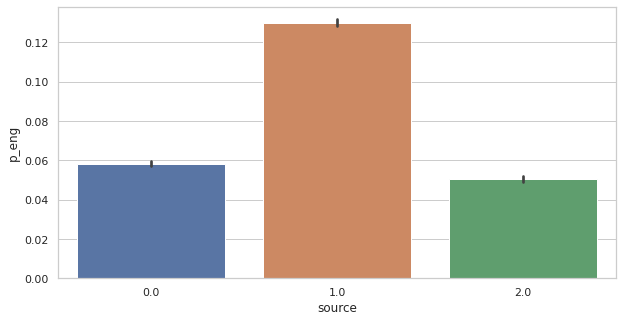

In [ ]:
# потроим гистрограмку для каждого из классов
plt.figure(figsize=(10, 5))
sns.barplot(x="source", y="p_eng", data=train_df, )

In [ ]:
# как и следовало ожидать, английские слова чаще используются(в процентном соотношении) в 1ой тематике(тема Технологий)

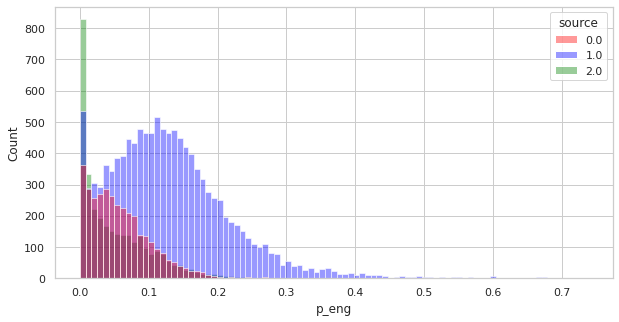

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(x="p_eng", data=train_df, hue="source", palette=["red", "blue", "green"], alpha=0.4)

In [ ]:
# как минимум по порогу p_eng > 0.2 можно отделять часть статей по теме Технологий

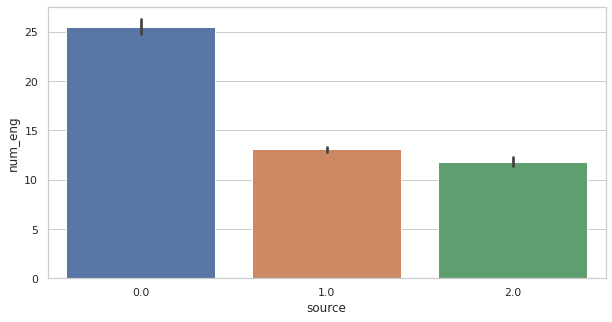

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x="source", y="num_eng", data=train_df, )

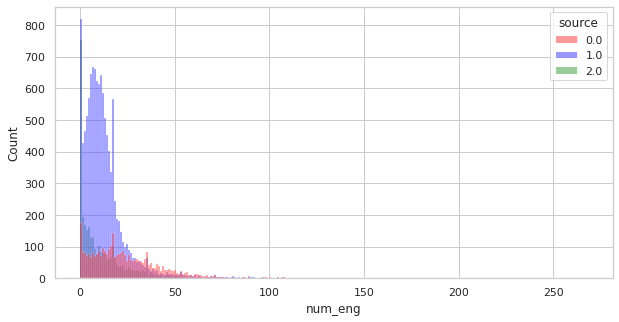

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(x="num_eng", data=train_df, hue="source", palette=["red", "blue", "green"], alpha=0.4)

In [ ]:
# судя по всему данный признак не столь информативен, что впринципе и логично т.к. нормализация на длину статтьи
# воплне оправданный ход, что мы и наблюдаем на прошлых графиках

### Разобьём данные на train, val

In [ ]:
from sklearn.model_selection import train_test_split

In [30]:
X = train_df
#X = train_df.drop(columns=["p_eng", "num_eng"])
#y = train_df[["source"]]

In [ ]:
X.to_csv("X_df.csv")

In [ ]:
X_train_df, X_val_df = train_test_split(X, test_size=0.2, random_state=SEED, stratify=X["source"])
X_train_df.shape, X_val_df.shape

((14688, 2), (3672, 2))

In [ ]:
X_train_df["source"].value_counts(normalize=True)

1    0.637119
0    0.188181
2    0.174700
Name: source, dtype: float64

In [ ]:
X_val_df["source"].value_counts(normalize=True)

1    0.637255
0    0.188181
2    0.174564
Name: source, dtype: float64

In [ ]:
# стратификация отработала правильно

In [29]:
X_train_df

NameError: ignored

In [ ]:
# сохраним X_train_df, X_val_df для дальнейшего использования

X_train_df.to_csv("X_train_df.csv")
X_val_df.to_csv("X_val_df.csv")

### Воспользуемся torchtext для работы с текстовыми данными

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [32]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [33]:
import torchtext
from torchtext.legacy import datasets
from torchtext.legacy.data import Field, LabelField
from torchtext.legacy.data import TabularDataset
from torchtext.legacy.data import BucketIterator

from torchtext.vocab import Vectors, GloVe

In [34]:
from tqdm import tqdm

In [35]:
def tokenizer(text):
    self = tokenizer
    
    if not hasattr(self, "stopwords"):
        import nltk
        nltk.download('stopwords')
        from nltk.corpus import stopwords
        
        stopwords_eng = set(stopwords.words("english"))
        stopwords_rus = set(stopwords.words("russian"))
        
        self.stopwords = stopwords_eng.union(stopwords_rus)
    
    import string
    from nltk import word_tokenize
    
    tokens = [word for word in word_tokenize(text) \
              if word not in self.stopwords and \
              all(c not in string.punctuation for c in word) and \
              len(word) > 1]
    return tokens

In [36]:
TEXT_Field = Field(tokenize=tokenizer, sequential=True, use_vocab=True, lower=True, include_lengths=True)    
LABEL_Field = LabelField(sequential=False, use_vocab=False, dtype=torch.float)

In [37]:
fields = [("index", None), ("text", TEXT_Field), ("label", LABEL_Field)]

In [38]:
X_train_csv_path = "X_train_df.csv"
X_val_csv_path = "X_val_df.csv"

In [39]:
train_torchtext_Dataset = TabularDataset(path=os.path.join(ROOT, X_train_csv_path),
                               format="CSV",
                               fields=fields,
                               skip_header=True
                              )

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [40]:
val_torchtext_Dataset = TabularDataset(path=os.path.join(ROOT, X_val_csv_path),
                               format="CSV",
                               fields=fields,
                               skip_header=True
                              )

In [41]:
# пример того, как отрабатывает реализованный нами tokenizer

In [42]:
train_torchtext_Dataset.examples[2].text

['компания',
 'sony',
 'показала',
 'выглядеть',
 'консоль',
 'следующего',
 'поколения',
 'playstation',
 'сообщает',
 'the',
 'verge',
 'неожиданно',
 'многих',
 'приставка',
 'выполнена',
 'преимущественно',
 'белом',
 'цвете',
 'черной',
 'вставкой',
 'посередине',
 'цветовое',
 'решение',
 'геймпада',
 'совпадает',
 'дизайном',
 'консоли',
 'ps5',
 'расположить',
 'вертикально',
 'горизонтально',
 'существует',
 'специальная',
 'подставка',
 'при',
 'пользователю',
 'будут',
 'доступны',
 'две',
 'версии',
 'одна',
 'дисководом',
 '4k',
 'вторая',
 'предназначенная',
 'игр',
 'последняя',
 'выглядит',
 'значительно',
 'счет',
 'отсутствия',
 'дисковода',
 'кроме',
 'рамках',
 'презентации',
 'sony',
 'представила',
 'беспроводную',
 'гарнитуру',
 'пульт',
 'дистанционного',
 'управления',
 'выполненные',
 'едином',
 'стиле',
 'стоимость',
 'playstation',
 'пока',
 'раскрыта',
 'инсайдеры',
 'утверждают',
 'цена',
 'составит',
 'около',
 '450',
 'это',
 'неофициальная',
 'информаци

In [43]:
train_torchtext_Dataset.examples[2].label

'0'

In [44]:
len(train_torchtext_Dataset.examples), len(val_torchtext_Dataset.examples)

(14688, 3672)

In [ ]:
#X_csv_path = "X_df.csv"

In [ ]:
#torchtext_Dataset = TabularDataset(path=os.path.join(ROOT, X_csv_path),
#                               format="CSV",
#                               fields=fields,
#                               skip_header=True
#                              )

In [45]:
vec = torchtext.vocab.FastText(language='ru', cache=CACHE_DIR)
vec

In [46]:
TEXT_Field.build_vocab(train_torchtext_Dataset, vectors=vec)
LABEL_Field.build_vocab(train_torchtext_Dataset)

In [47]:
TEXT_Field.vocab.vectors.size()

torch.Size([157937, 300])

In [48]:
TEXT_Field.vocab.freqs.most_common(n=20)

[('это', 14920),
 ('также', 13266),
 ('компании', 11614),
 ('года', 10842),
 ('apple', 10043),
 ('рублей', 9721),
 ('по', 8704),
 ('компания', 8415),
 ('которые', 8366),
 ('google', 7891),
 ('россии', 7622),
 ('году', 6586),
 ('который', 6189),
 ('млн', 6110),
 ('гб', 6095),
 ('iphone', 5834),
 ('пользователей', 5555),
 ('время', 5504),
 ('на', 5416),
 ('сша', 5146)]

In [49]:
LABEL_Field.vocab.freqs

Counter({'0': 2764, '1': 9358, '2': 2566})

In [50]:
# воспользуемя BucketIterator
train_torchtext_dataloader, val_torchtext_dataloader = BucketIterator.splits(
    (train_torchtext_Dataset, val_torchtext_Dataset), 
    batch_size=64,
    device = device,
    sort_key=lambda x: len(x.text),
    sort=False,
    shuffle=True,
    sort_within_batch=True
    )

In [51]:
train_torchtext_dataloader.create_batches()
val_torchtext_dataloader.create_batches()

In [52]:
# проверим на корректность работы 
for batch_no, batch in enumerate(train_torchtext_dataloader):
    text, batch_len = batch.text # text.size() -> seq_len, batch_size
    print(text, batch_len, sep="\n")
    print(batch.label)
    break

tensor([[    78,   2483,     27,  ...,  46696,     69,  32942],
        [    56,   1494,    666,  ...,  57301,    958,   1181],
        [     4,  12650,   5655,  ..., 144737,   1947,    728],
        ...,
        [   348,     62,    169,  ...,    487,     47,  28157],
        [   920,     11,     70,  ...,    381,    549,  27658],
        [     7,   2816,      5,  ...,      1,      1,      1]],
       device='cuda:0')
tensor([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,  99,
         99,  99,  99,  99,  99,  99,  99,  99,  99,  99,  99,  99,  99,  99,
         99,  99,  99,  99,  99,  99,  99,  99,  99,  99,  99,  99,  99,  99,
         99,  99,  99,  99,  99,  99,  99,  99], device='cuda:0')
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
        1., 1., 1., 1., 1., 1., 1., 1., 

In [53]:
text.size(), batch_len.size(), batch.label.size()

(torch.Size([100, 64]), torch.Size([64]), torch.Size([64]))

### Создадим архитектуру нейронной сети

In [54]:
from torch.nn import RNN, GRU, LSTM

In [90]:
class RNNBaseline(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, 
                 bidirectional, dropout, pad_idx):
        
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
        
        # YOUR CODE GOES HERE
        self.lstm = LSTM(input_size=embedding_dim, hidden_size=hidden_dim, num_layers=n_layers, bidirectional=bidirectional, dropout=dropout)
        # YOUR CODE GOES HERE
        self.fc = nn.Sequential(
            nn.Linear(2 * hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
                
    def forward(self, text, text_lengths):
        
        #text = [sent len, batch size]
        
        embedded = self.embedding(text)
        
        #embedded = [sent len, batch size, emb_dim]
        
        #pack sequence
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths, enforce_sorted=True).to(device)
        
        # cell arg for LSTM, remove for GRU
        packed_output, (hidden, cell) = self.lstm(packed_embedded)

        #unpack sequence
        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)  

        #output = [sent len, batch size, hid dim * num directions]
        #output over padding tokens are zero tensors
        
        #hidden = [num layers * num directions, batch size, hid dim]
        #cell = [num layers * num directions, batch size, hid dim]
        
        #concat the final forward (hidden[-2,:,:]) and backward (hidden[-1,:,:]) hidden layers
        #and apply dropout
        
        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)  # YOUR CODE GOES HERE
                
        #hidden = [batch size, hid dim * num directions] or [batch_size, hid dim * num directions]
        #print(hidden.size()) # (batch_size, 2 * hidden_size)
        return self.fc(hidden) # (batch_size, output_dim)

In [56]:
# train_val loop

In [57]:
def fit_epoch(model, train_dataloader, criterion, optimizer, epoch, device):
    pbar = tqdm(enumerate(train_dataloader), total=len(train_dataloader), leave=False)
    pbar.set_description(f"Epoch {epoch}")

    model.train()

    running_loss = 0.0
    running_corrects = 0
    processed_size = 0
  
    for i, (inputs, labels) in pbar:
        text, text_length = inputs
        
        optimizer.zero_grad()

        outputs = model(text, text_length.cpu())
        loss = criterion(outputs, labels.type(dtype=torch.LongTensor).to(device))
        loss.backward()
        optimizer.step()

        preds = torch.argmax(outputs, 1)
        
        running_loss += loss.detach().cpu().item()
        running_corrects += torch.sum(preds == labels).cpu()
        processed_size += text.size(1) # !!! because batch_first=False
              
    train_loss = running_loss / processed_size
    train_acc = running_corrects.numpy() / processed_size
    return train_loss, train_acc

In [58]:
def eval_epoch(model, val_dataloader, criterion, epoch, device):
    pbar = tqdm(enumerate(val_dataloader), total=len(val_dataloader), leave=False)
    pbar.set_description(f"Epoch {epoch}")
    
    model.eval()

    running_loss = 0.0
    running_corrects = 0
    processed_size = 0

    for i, (inputs, labels) in pbar:
        text, text_length = inputs
        
        with torch.no_grad():
            outputs = model(text, text_length.cpu())
            loss = criterion(outputs, labels.type(dtype=torch.LongTensor).to(device))

            preds = torch.argmax(outputs, 1)

        running_loss += loss.cpu().item()
        running_corrects += torch.sum(preds == labels).cpu()
        processed_size += text.size(1)

    val_loss = running_loss / processed_size
    val_acc = running_corrects.numpy() / processed_size
    return val_loss, val_acc

In [59]:
def train_val_loop(model, opt, loss_func, train_dataloader, val_dataloader, max_epochs=100, patience=20, device=device):
    
    train_loss_history = []
    val_loss_history = []
    train_metrics_history = []
    val_metrics_history = []
    
    min_loss = np.inf
    cur_patience = 0

    for epoch in range(1, max_epochs + 1):

        train_loss, train_acc = fit_epoch(model, train_dataloader, loss_func, opt, epoch, device)
        train_loss_history.append(train_loss)
        train_metrics_history.append(train_acc)



        val_loss, val_acc = eval_epoch(model, val_dataloader, loss_func, epoch, device)
        val_loss_history.append(val_loss)
        val_metrics_history.append(val_acc)

        if val_loss < min_loss:
            min_loss = val_loss
            best_model = model.state_dict()
            print("Save best model(Epoch: {})".format(epoch))
        else:
            cur_patience += 1
            if cur_patience == patience:
                cur_patience = 0
                break

        print('Epoch: {}, Training Loss: {}, Validation Loss: {}'.format(epoch, train_loss, val_loss))
        print("---------  Training accuracy: {}, Validation accuracy: {}".format(train_acc, val_acc))

    model.load_state_dict(best_model)
    
    return train_loss_history, train_metrics_history, val_loss_history, val_metrics_history, model

In [ ]:
#def predict(model, test_dataloader, device):
#    model.eval()
#    
#    with torch.no_grad():
#        logits = []
#    
#        for inputs in test_dataloader:
#            inputs = inputs.to(device)
#            outputs = model(inputs).cpu()
#            logits.append(outputs)
#            
#    predictions = torch.argmax(torch.cat(logits), dim=1).numpy()
#    #print(predictions.shape)
#    return predictions

In [60]:
def plot_metrics_loss_history(train_loss_history, train_metrics_history, val_loss_history, val_metrics_history):
    epochs = [i for i in range(1, len(train_loss_history) + 1)]
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 10)
    
    ax1.plot(epochs, train_loss_history, label="train_loss")
    ax1.plot(epochs, val_loss_history, label="val_loss")
    ax1.legend()
    
    ax2.plot(epochs, train_metrics_history, label="train_accuracy")
    ax2.plot(epochs, val_metrics_history, label="val_accuracy")
    ax2.legend()

In [61]:
# 

# 1ая модель - обучение

In [ ]:
vocab_size = len(TEXT_Field.vocab) # размер словаря(кол-во слов в словаре)
emb_dim = 300 # размерность embeddings
hidden_dim = 256 # размерность скрытого состояния 
output_dim = 3 # кол-во выходных слоёв после линейного слоя
n_layers = 3 # кол - во рекуррентных ячеек
bidirectional = True
dropout = 0.3
PAD_IDX = TEXT_Field.vocab.stoi[TEXT_Field.pad_token]

In [ ]:
weights = torch.tensor([5.3, 1.6, 5.7]).to(device)

In [ ]:
1.0    1.567040
0.0    5.285948
2.0    5.692388

SyntaxError: ignored

In [ ]:
lstm_model = RNNBaseline(
    vocab_size=vocab_size,
    embedding_dim=emb_dim,
    hidden_dim=hidden_dim,
    output_dim=output_dim,
    n_layers=n_layers,
    bidirectional=bidirectional,
    dropout=dropout,
    pad_idx=PAD_IDX
)

In [ ]:
lstm_model = lstm_model.to(device)

In [ ]:
lstm_model.embedding.weight.data.copy_(TEXT_Field.vocab.vectors)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.1336,  0.2129,  0.2556,  ...,  0.0329,  0.0560,  0.0457],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0')

In [ ]:
opt = torch.optim.Adam(lstm_model.parameters())
loss_func = nn.CrossEntropyLoss(weight=weights, reduction="sum")

In [ ]:
# обучение модели

In [ ]:
train_loss_history, train_metrics_history, val_loss_history, val_metrics_history, lstm_model =\
    train_val_loop(lstm_model, opt, loss_func, train_torchtext_dataloader, val_torchtext_dataloader, max_epochs=20, patience=10, device=device)

Save best model(Epoch: 1)
Epoch: 1, Training Loss: 2.548034345662152, Validation Loss: 2.0469842528465785
---------  Training accuracy: 0.704588779956427, Validation accuracy: 0.6955337690631809


Save best model(Epoch: 2)
Epoch: 2, Training Loss: 1.4070278372055565, Validation Loss: 1.6295826090966434
---------  Training accuracy: 0.8442265795206971, Validation accuracy: 0.846677559912854


Save best model(Epoch: 3)
Epoch: 3, Training Loss: 0.568056875884468, Validation Loss: 1.1608394979132026
---------  Training accuracy: 0.9409722222222222, Validation accuracy: 0.9060457516339869


Epoch: 4, Training Loss: 0.12650423131483426, Validation Loss: 1.2683954586910007
---------  Training accuracy: 0.9870642701525054, Validation accuracy: 0.9074074074074074


Epoch: 5, Training Loss: 0.023033186680557913, Validation Loss: 1.3832816292485122
---------  Training accuracy: 0.9978213507625272, Validation accuracy: 0.9297385620915033


Epoch: 6, Training Loss: 0.010912989691907831, Validation Loss: 1.5208299662633789
---------  Training accuracy: 0.9987064270152506, Validation accuracy: 0.9281045751633987


Epoch: 7, Training Loss: 0.002039754224230278, Validation Loss: 1.5357009399933883
---------  Training accuracy: 0.9998638344226579, Validation accuracy: 0.9327342047930284


Epoch: 8, Training Loss: 0.0002275039941451765, Validation Loss: 1.5929198450974973
---------  Training accuracy: 1.0, Validation accuracy: 0.9340958605664488


Epoch: 9, Training Loss: 0.00011180612666090513, Validation Loss: 1.6687001410977254
---------  Training accuracy: 1.0, Validation accuracy: 0.9338235294117647


Epoch: 10, Training Loss: 6.891867787840699e-05, Validation Loss: 1.713981711234662
---------  Training accuracy: 1.0, Validation accuracy: 0.934368191721133


Epoch: 11, Training Loss: 4.727459733216311e-05, Validation Loss: 1.7657773104478038
---------  Training accuracy: 1.0, Validation accuracy: 0.9340958605664488


Epoch: 12, Training Loss: 3.547934139544915e-05, Validation Loss: 1.8054460394591871
---------  Training accuracy: 1.0, Validation accuracy: 0.9340958605664488


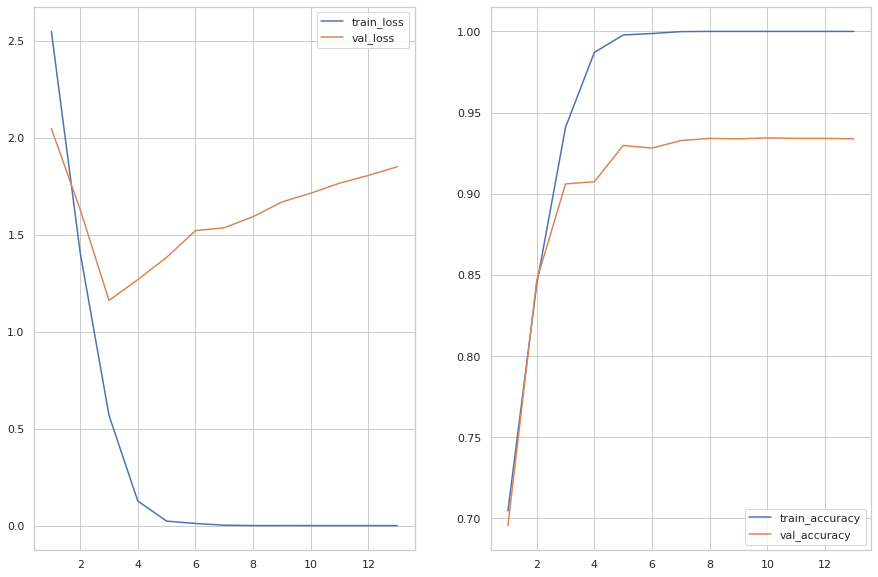

In [ ]:
plot_metrics_loss_history(train_loss_history, train_metrics_history, val_loss_history, val_metrics_history)

In [ ]:
# сохраняем модель и переходим к процессу предсказания, а пока выйдет из гпу
torch.save(lstm_model.cpu().state_dict(), os.path.join(ROOT, "lstm_model_v1.pt"))

In [62]:
# предобработаем тестовые данные для предсказаний на них
test_df = data_df[data_df["source"].isna()]
test_df

,news,source
18360,Глава форума Reddit Стив Хаффман раскритикова...,NaN
18361,Французское архитектурное бюро Vincent Calleb...,NaN
18362,"Samsung провела мероприятие Galaxy Unpacked, ...",NaN
18363,В бета-версии клиента Telegram для Android с ...,NaN
18364,Журналистам из XDA удалось раздобыть минималь...,NaN
...,...,...
19457,С 17 декабря в России блокируется один из кру...,NaN
19458,Первые упоминания разработки тёмной темы в Go...,NaN
19459,Компания Oppo презентовала два новых продукта...,NaN
19460,"Основой презентации стала Windows 10, которая...",NaN


In [63]:
test_df.to_csv("test_df.csv")
test_df_csv = "test_df.csv"

In [64]:
test_fields = [("index", None), ("text", TEXT_Field)] # TEXT_Field уже создан при train, val!!! # используем именно его

In [65]:
test_torchtext_Dataset = TabularDataset(path=os.path.join(ROOT, test_df_csv),
                               format="CSV",
                               fields=test_fields,
                               skip_header=True
                              )

In [66]:
test_torchtext_Dataset.examples[0].text

['глава',
 'форума',
 'reddit',
 'стив',
 'хаффман',
 'раскритиковал',
 'tiktok',
 'став',
 'первым',
 'руководителем',
 'кремниевой',
 'долины',
 'позволившим',
 'такие',
 'резкие',
 'слова',
 'адрес',
 'китайского',
 'приложения',
 'сообщает',
 'techcrunch',
 'tiktok',
 'является',
 'социальной',
 'сетью',
 'имеющей',
 'особенную',
 'популярность',
 'среди',
 'молодежи',
 'аудитория',
 'tiktok',
 'составляет',
 'сотни',
 'миллионов',
 'пользователей',
 '40',
 'юзеров',
 'дети',
 'подростки',
 '18',
 'лет',
 'пользователи',
 'tiktok',
 'помощи',
 'продвинутого',
 'редактора',
 'записывают',
 'короткие',
 'видео',
 'музыкой',
 'эффектами',
 'самые',
 'разные',
 'темы',
 'популярность',
 'приложения',
 'обусловлена',
 'оно',
 'позволяет',
 'непрофессионалам',
 'несколько',
 'кликов',
 'создавать',
 'сложные',
 'ролики',
 'невозможно',
 'instagram',
 'разработчиком',
 'tiktok',
 'является',
 'китайская',
 'компания',
 'bytedance',
 'хаффман',
 'участвовал',
 'которой',
 'числе',
 'прочих

In [67]:
from torchtext.legacy.data import Iterator

In [68]:
test_dataloader = Iterator(test_torchtext_Dataset, 20, device=device, shuffle=False)
test_dataloader

In [69]:
test_dataloader.create_batches()

In [70]:
# проверяем, всёли работает так как надо, данные идут в том же порядке
for batch_no, batch in enumerate(test_dataloader):
    text, batch_len = batch.text # text.size() -> seq_len, batch_size
    print(text, batch_len, sep="\n")
    break

tensor([[  220, 33141,    39,  ...,  6429,   399,   244],
        [ 3674, 74072,  2001,  ...,   179,  1131, 81904],
        [ 2444,  4984,  1722,  ..., 20077,  4413, 29465],
        ...,
        [    1,     1,     1,  ...,     1,     1,     1],
        [    1,     1,     1,  ...,     1,     1,     1],
        [    1,     1,     1,  ...,     1,     1,     1]], device='cuda:0')
tensor([346, 119, 203, 139,  52, 409,  58, 226, 393,  75, 111, 429,  72,  70,
         66,  86,  74, 108,  84, 180], device='cuda:0')


In [71]:
len(test_torchtext_Dataset.examples[0].text)

346

In [72]:
# А теперь переходим к предсказаниям модели

model_checkpoint_path = "lstm_model_v1.pt"

In [73]:
assert len(TEXT_Field.vocab) == 157937

In [74]:
vocab_size = len(TEXT_Field.vocab) # размер словаря(кол-во слов в словаре)
emb_dim = 300 # размерность embeddings
hidden_dim = 256 # размерность скрытого состояния 
output_dim = 3 # кол-во выходных слоёв после линейного слоя
n_layers = 3 # кол - во рекуррентных ячеек
bidirectional = True
dropout = 0.3
PAD_IDX = TEXT_Field.vocab.stoi[TEXT_Field.pad_token]

In [91]:
class RNNBaseline(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, 
                 bidirectional, dropout, pad_idx):
        
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
        
        # YOUR CODE GOES HERE
        self.lstm = LSTM(input_size=embedding_dim, hidden_size=hidden_dim, num_layers=n_layers, bidirectional=bidirectional, dropout=dropout)
        # YOUR CODE GOES HERE
        self.fc = nn.Sequential(
            nn.Linear(2 * hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
                
    def forward(self, text, text_lengths):
        
        #text = [sent len, batch size]
        
        embedded = self.embedding(text)
        
        #embedded = [sent len, batch size, emb_dim]
        
        #pack sequence
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths, enforce_sorted=False).to(device) # !!!!!!!!!!!!!! enforce_sorted=False для предсказания
        
        # cell arg for LSTM, remove for GRU
        packed_output, (hidden, cell) = self.lstm(packed_embedded)

        #unpack sequence
        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)  

        #output = [sent len, batch size, hid dim * num directions]
        #output over padding tokens are zero tensors
        
        #hidden = [num layers * num directions, batch size, hid dim]
        #cell = [num layers * num directions, batch size, hid dim]
        
        #concat the final forward (hidden[-2,:,:]) and backward (hidden[-1,:,:]) hidden layers
        #and apply dropout
        
        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)  # YOUR CODE GOES HERE
                
        #hidden = [batch size, hid dim * num directions] or [batch_size, hid dim * num directions]
        #print(hidden.size()) # (batch_size, 2 * hidden_size)
        return self.fc(hidden) # (batch_size, output_dim)

In [92]:
lstm_model = RNNBaseline(
    vocab_size=vocab_size,
    embedding_dim=emb_dim,
    hidden_dim=hidden_dim,
    output_dim=output_dim,
    n_layers=n_layers,
    bidirectional=bidirectional,
    dropout=dropout,
    pad_idx=PAD_IDX
)

In [93]:
lstm_model.load_state_dict(torch.load(model_checkpoint_path))

<All keys matched successfully>

In [94]:
lstm_model.to(device)

RNNBaseline(
  (embedding): Embedding(157937, 300, padding_idx=1)
  (lstm): LSTM(300, 256, num_layers=3, dropout=0.3, bidirectional=True)
  (fc): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=3, bias=True)
  )
)

In [98]:
def predict(model, test_dataloader, device):
    pbar = tqdm(enumerate(test_dataloader), total=len(test_dataloader), leave=False)
    
    model.eval()

    with torch.no_grad():
        running_logits = []

        for i, (inputs) in pbar:
            #print(inputs)
            text, text_length = inputs.text
            #print(text, text_length)
      
            outputs = model(text, text_length.cpu())

            running_logits.append(outputs.cpu())

    predicitons = torch.argmax(torch.cat(running_logits), dim=1).cpu().numpy()
    return predictions

In [100]:
predictions = predict(lstm_model, test_dataloader, device)

array([0, 1, 1, ..., 1, 0, 1])

In [102]:
predictions

array([0, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [80]:
def create_scv_file(name, predictions, root=ROOT):
    df = pd.DataFrame(np.squeeze(predictions))
    
    df.to_csv(os.path.join(root, name), index=False, header=False)
    print("save predictions in: {}".format(os.path.join(root, name)))

In [ ]:
create_scv_file("lstm_model_v1_submit1.csv", predictions)